In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("PastHires.csv")

In [3]:
data

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
d = {'Y':1,'N':0}
data['Hired']=data['Hired'].map(d)

In [6]:
features = list(data.columns)
del features[-1]
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [7]:
X = data[features]
y = data['Hired']  

In [8]:
X['Employed?']=X['Employed?'].map(d)
X['Top-tier school']=X['Top-tier school'].map(d)
e = {'BS':0,'MS':1,'PhD':2}
X['Level of Education'] = X['Level of Education'].map(e)
X['Interned'] = X['Interned'].map(d)

C:\Users\Ujjwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ujjwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ujjwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [9]:
X

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,0,0,0
1,0,0,0,0,1,1
2,7,0,6,0,0,0
3,2,1,1,1,1,0
4,20,0,2,2,1,0
5,0,0,0,2,1,1
6,5,1,2,1,0,1
7,3,0,1,0,0,1
8,15,1,5,0,0,0
9,0,0,0,0,0,0


In [10]:
Dtree_gini = DecisionTreeClassifier(criterion='gini')
Dtree_gini.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
from sklearn.tree import export_graphviz

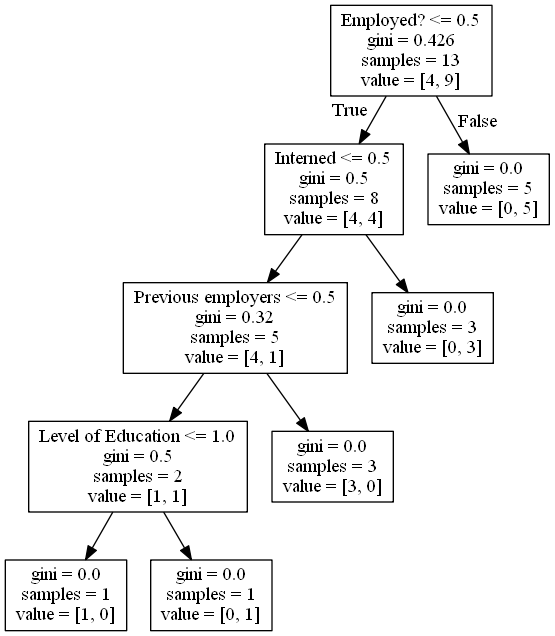

In [12]:
dot_data = StringIO()
export_graphviz(Dtree_gini, out_file=dot_data,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [13]:
data.head(1)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,1


In [14]:
Dtree_gini.predict([[5,0,0,1,1,0]])

array([0], dtype=int64)

In [15]:
from math import log
log(1,2)

0.0

In [17]:
data[1:6]

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,1
2,7,N,6,BS,N,N,0
3,2,Y,1,MS,Y,N,1
4,20,N,2,PhD,Y,N,0
5,0,N,0,PhD,Y,Y,1


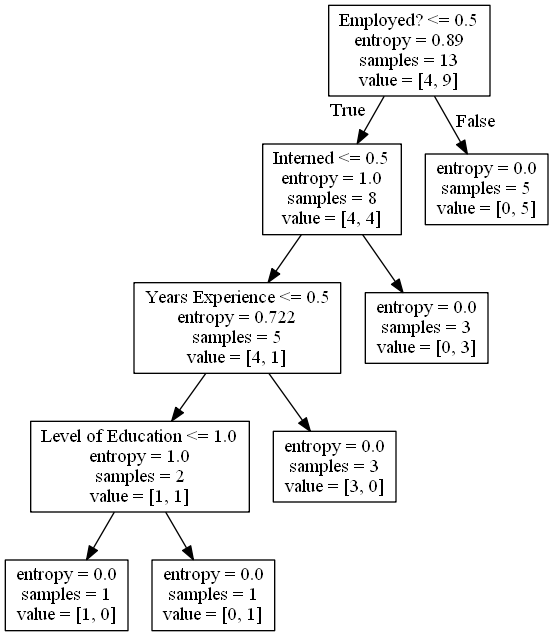

In [32]:
Dtree_entropy = DecisionTreeClassifier(criterion='entropy')
Dtree_entropy.fit(X,y)
dot_data = StringIO()
export_graphviz(Dtree_entropy, out_file=dot_data,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [22]:
from sklearn.ensemble import RandomForestClassifier 

In [24]:
random_forest_model = RandomForestClassifier(n_estimators = 10)
random_forest_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
random_forest_model.predict(X)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [29]:
y.values

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [31]:
random_forest_model.predict([[1,0,1,0,0,0]])

array([0], dtype=int64)